In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./heart.csv")  # change path if needed



HeartDisease
1    508
0    410
Name: count, dtype: int64


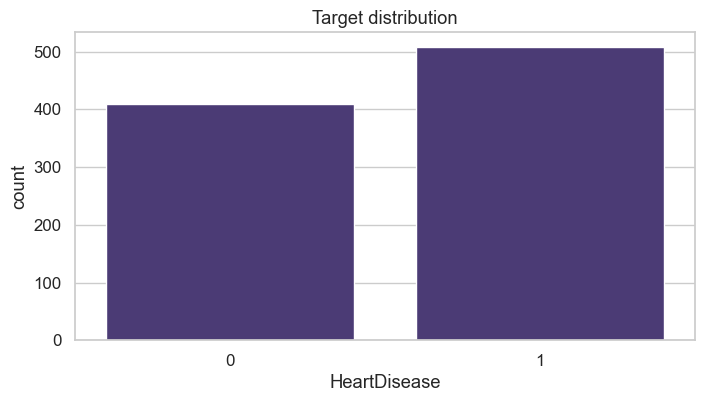

In [ ]:
# target - class balance
print(df['HeartDisease'].value_counts())
sns.countplot(x='HeartDisease', data=df)
plt.title('Target distribution')
plt.show()

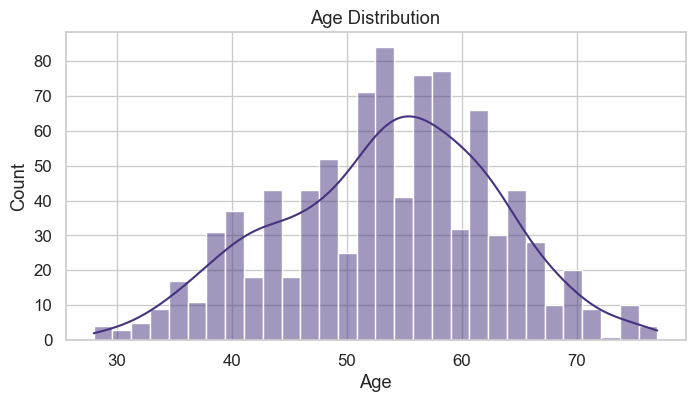

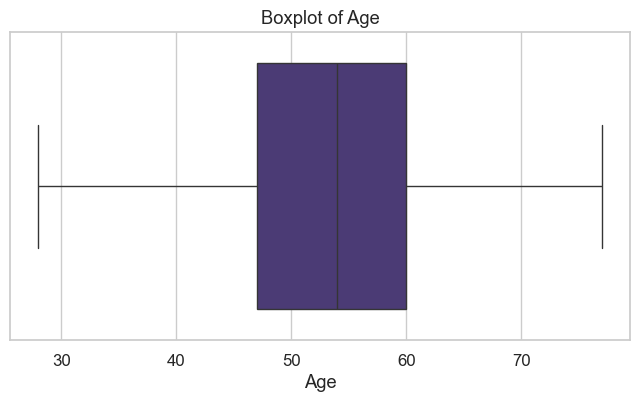

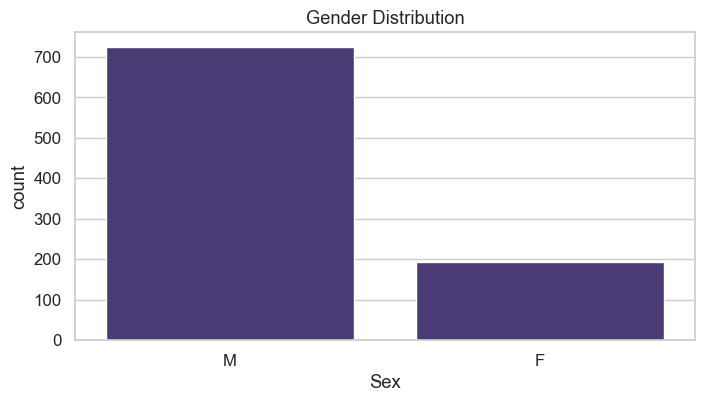

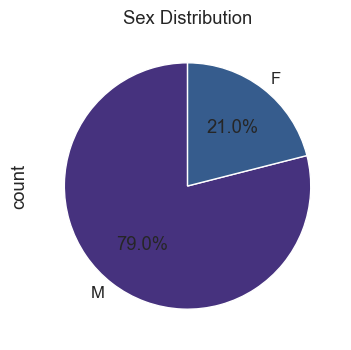

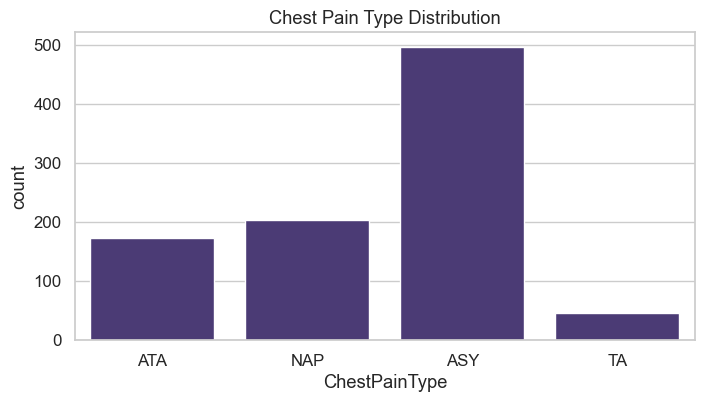

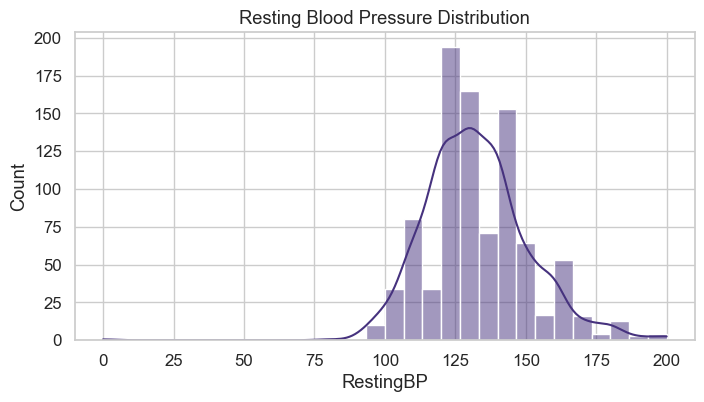

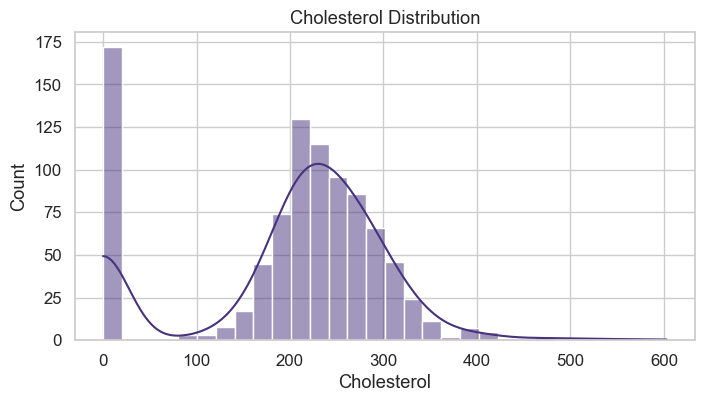

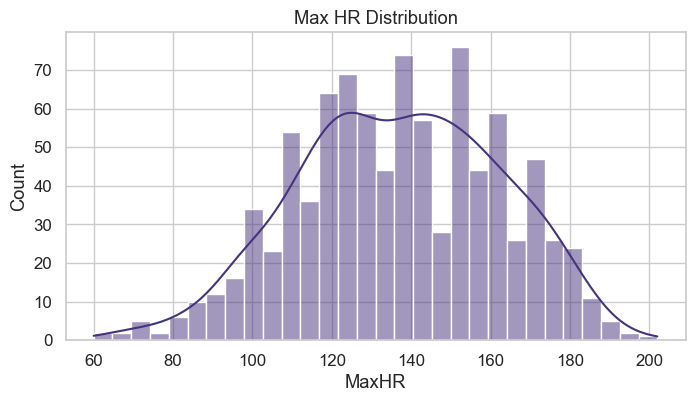

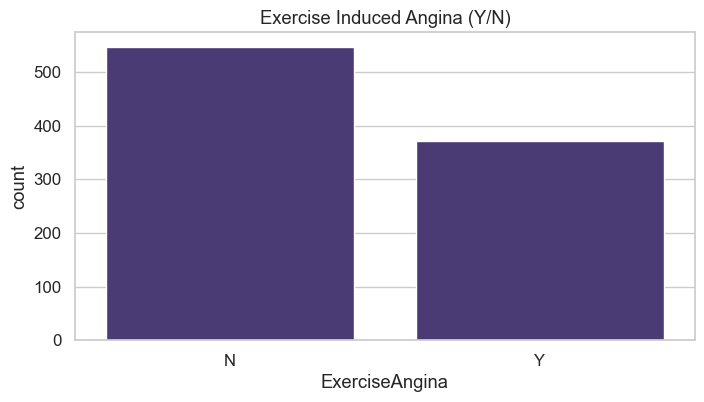

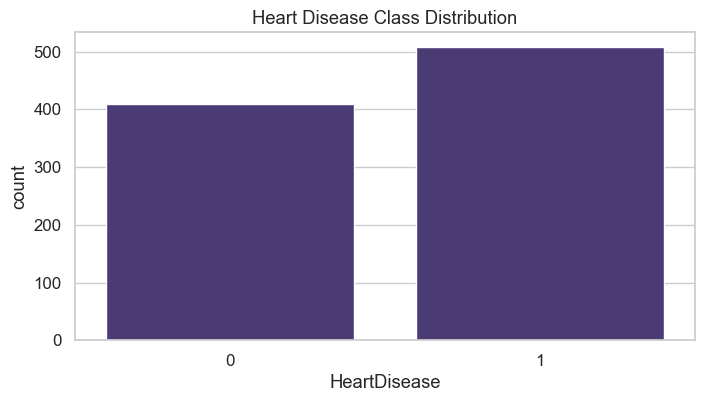

In [328]:
# EDA -  Each Feature 
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Sex Distribution")
plt.show()

sns.countplot(x='ChestPainType', data=df)
plt.title("Chest Pain Type Distribution")
plt.show()


sns.histplot(df['RestingBP'], bins=30, kde=True)
plt.title("Resting Blood Pressure Distribution")
plt.show()


sns.histplot(df['Cholesterol'], bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.show()


sns.histplot(df['MaxHR'], bins=30, kde=True)
plt.title("Max HR Distribution")
plt.show()


sns.countplot(x='ExerciseAngina', data=df)
plt.title("Exercise Induced Angina (Y/N)")
plt.show()


sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()


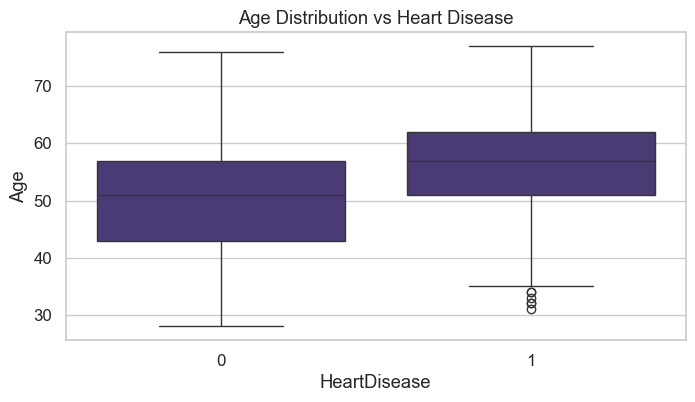

In [329]:
# Age vs Heart Disease
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age Distribution vs Heart Disease')
plt.show()

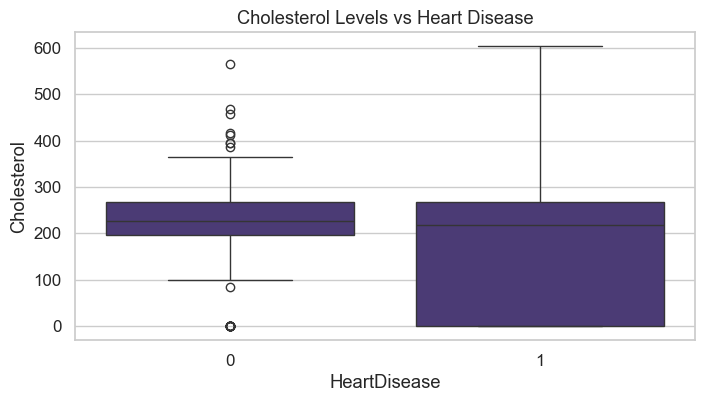

In [330]:
# Cholesterol vs Heart Disease
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol Levels vs Heart Disease')
plt.show()

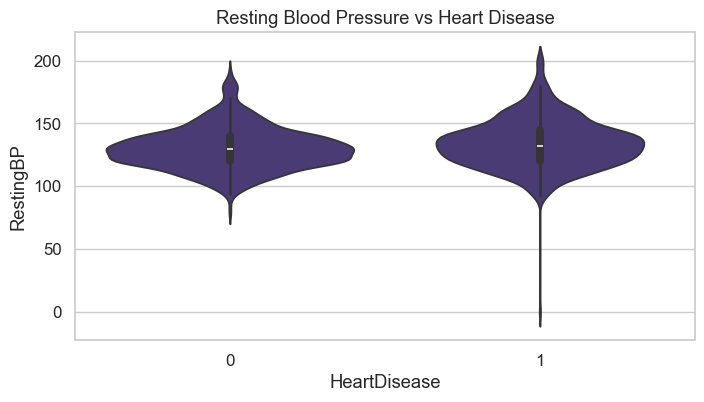

In [331]:
# RestingBP vs Heart Disease
sns.violinplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.show()


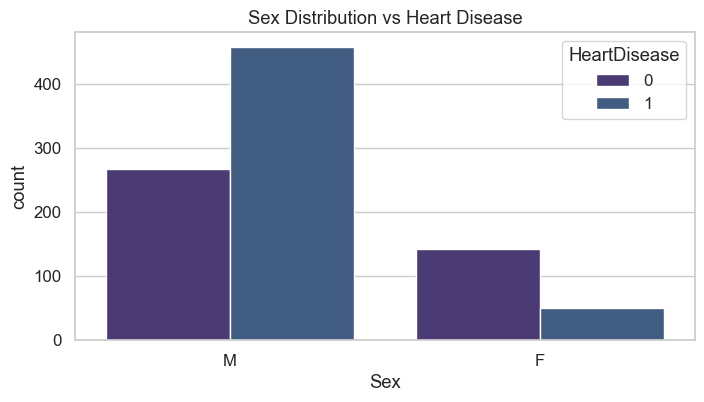

In [332]:
# Sex vs Heart Disease
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Sex Distribution vs Heart Disease')
plt.show()

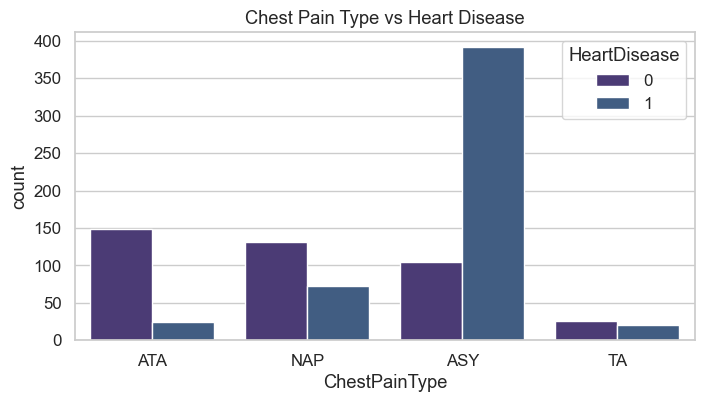

In [333]:
# ChestPainType vs Heart Disease
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

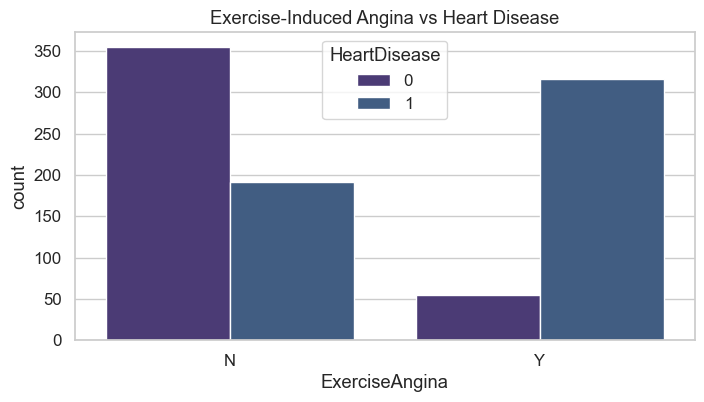

In [334]:
# ExerciseAngina vs Heart Disease
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.show()

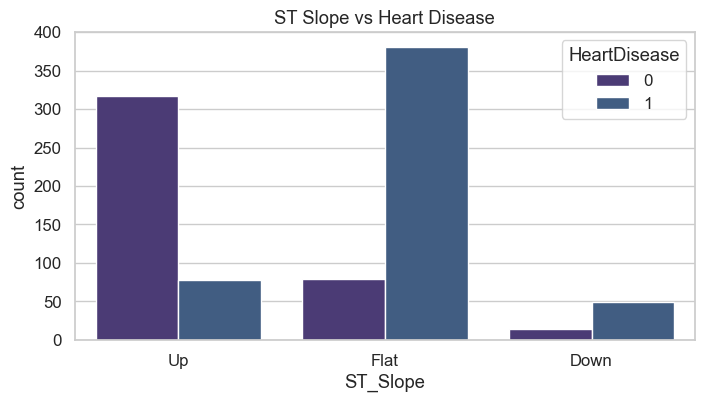

In [335]:
# ST_Slope vs Heart Disease
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title('ST Slope vs Heart Disease')
plt.show()

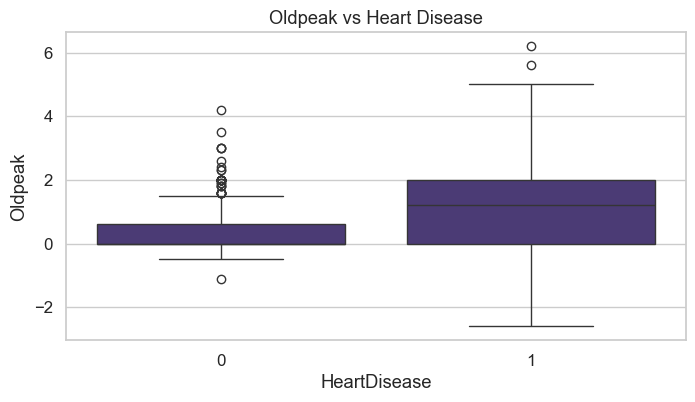

In [336]:
# Oldpeak vs Heart Disease
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title('Oldpeak vs Heart Disease')
plt.show()

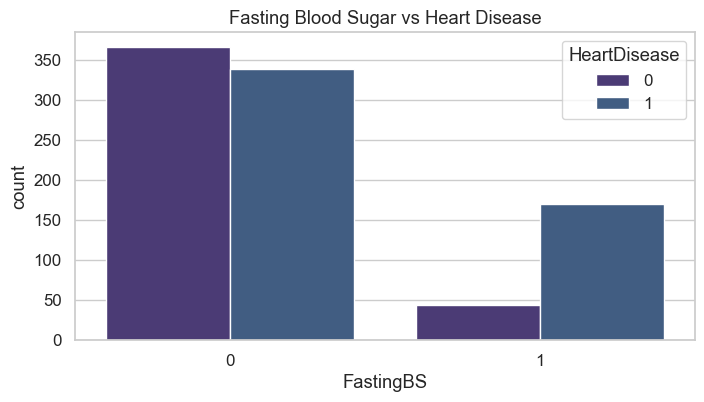

In [337]:
# FastingBS vs Heart Disease
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.show()

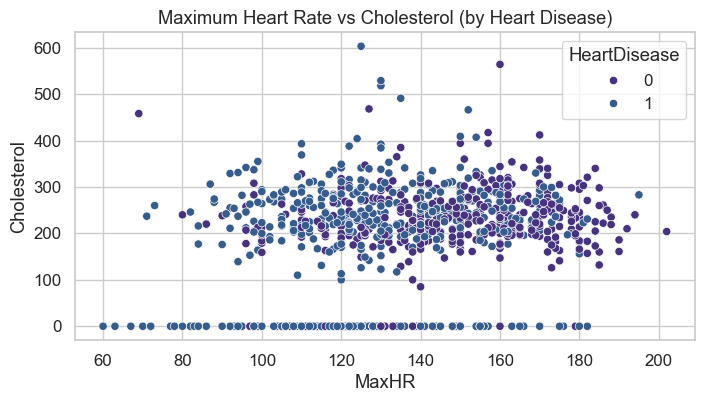

In [338]:
# MaxHR vs Cholesterol (Scatter)
sns.scatterplot(x='MaxHR', y='Cholesterol', hue='HeartDisease', data=df)
plt.title('Maximum Heart Rate vs Cholesterol (by Heart Disease)')
plt.show()

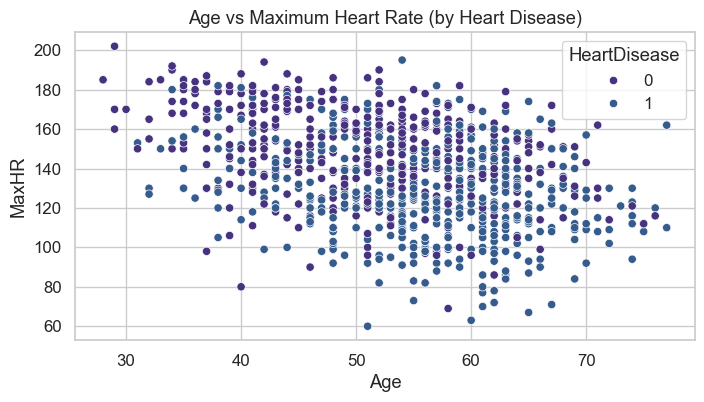

In [339]:
# Age vs MaxHR
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df)
plt.title('Age vs Maximum Heart Rate (by Heart Disease)')
plt.show()

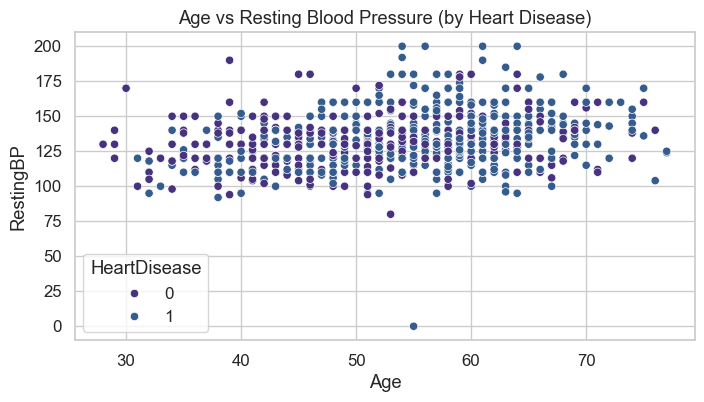

In [340]:
# Age vs RestingBP
sns.scatterplot(x='Age', y='RestingBP', hue='HeartDisease', data=df)
plt.title('Age vs Resting Blood Pressure (by Heart Disease)')
plt.show()

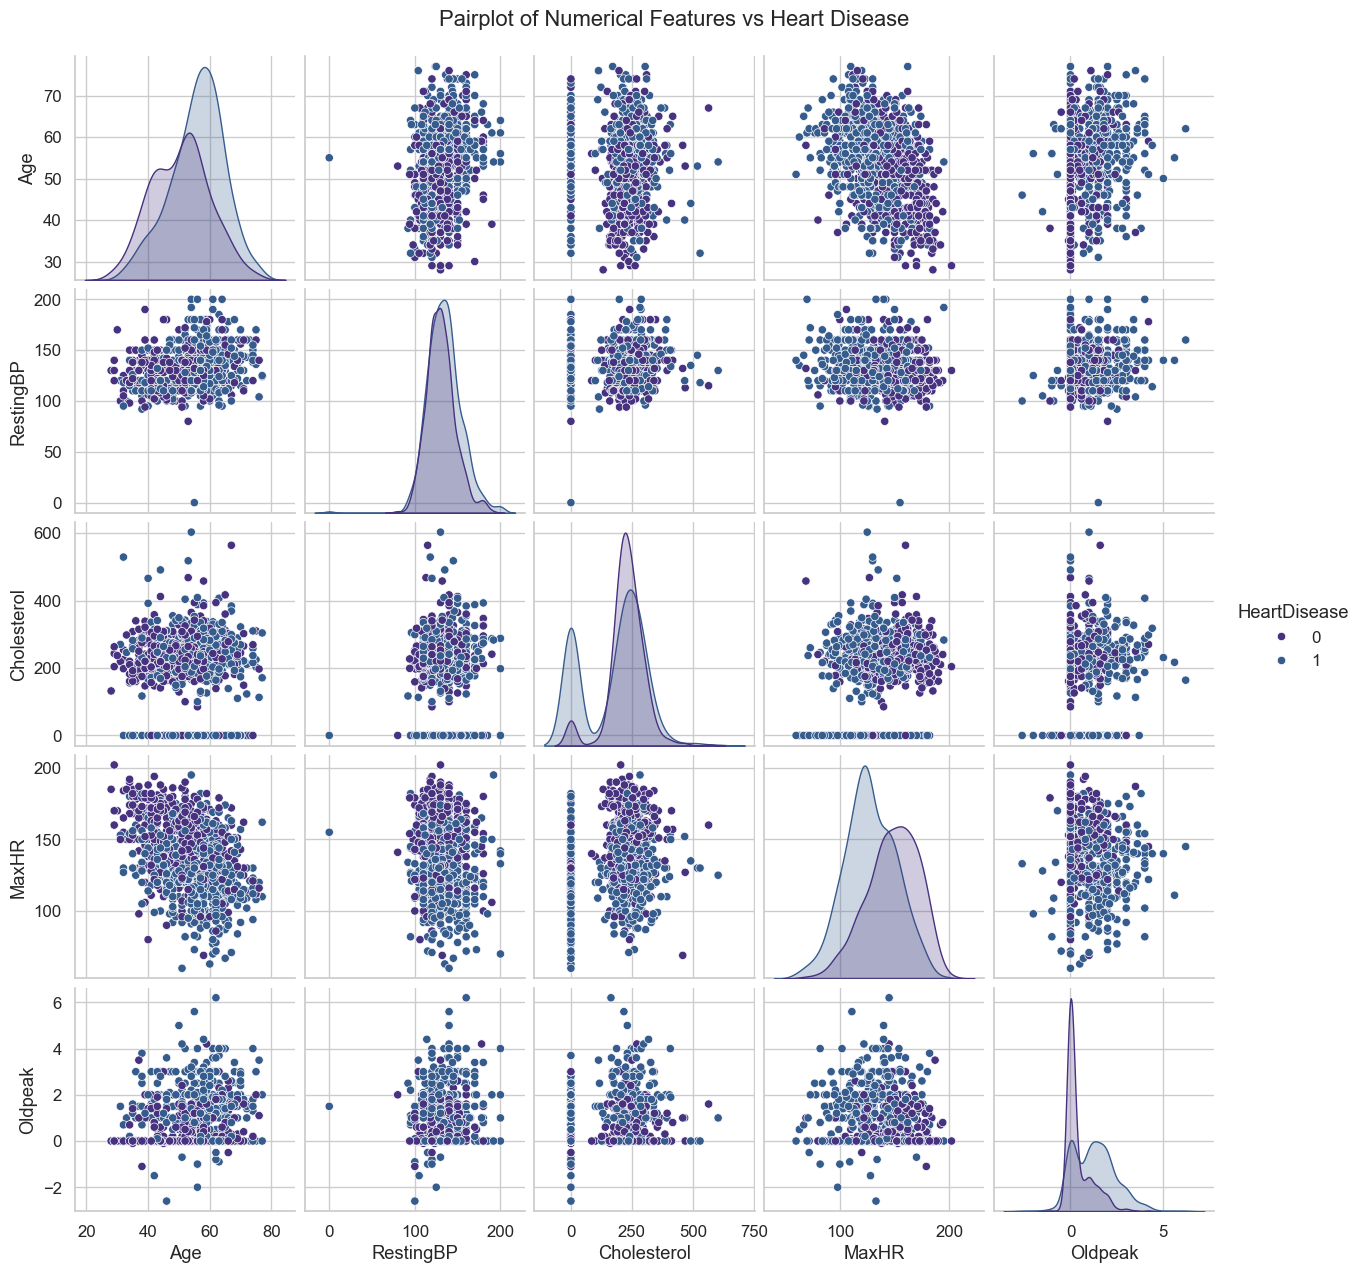

In [341]:
# Pairplot
sns.pairplot(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']], hue='HeartDisease')
plt.suptitle('Pairplot of Numerical Features vs Heart Disease', y=1.02)
plt.show()

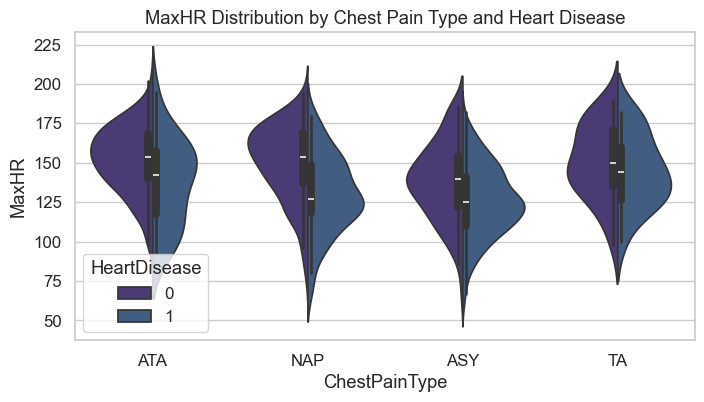

In [342]:
# MaxHR - ChestPainType
sns.violinplot(x='ChestPainType', y='MaxHR', hue='HeartDisease', data=df, split=True)
plt.title('MaxHR Distribution by Chest Pain Type and Heart Disease')
plt.show()

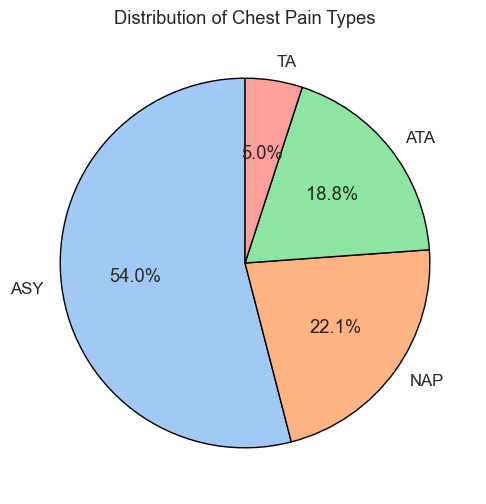

In [343]:
# ChestPainType
plt.figure(figsize=(6,6))
df['ChestPainType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    wedgeprops={'edgecolor':'black'}
)
plt.title('Distribution of Chest Pain Types')
plt.ylabel('')  # remove default ylabel
plt.show()


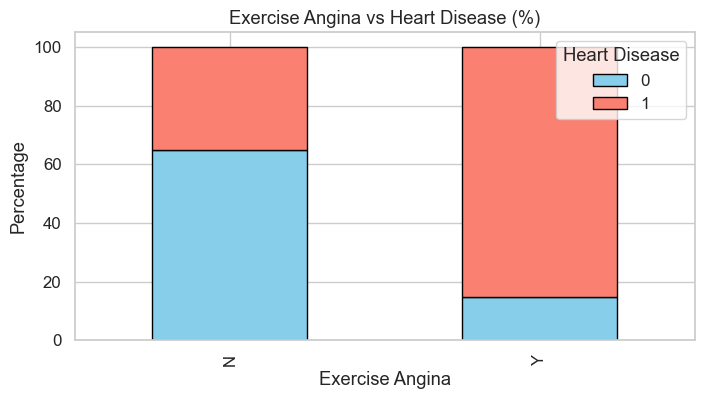

In [344]:
# Bar % plot for ExerciseAngina vs HeartDisease
cross = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize='index') * 100
cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')
plt.ylabel('Percentage')
plt.xlabel('Exercise Angina')
plt.title('Exercise Angina vs Heart Disease (%)')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

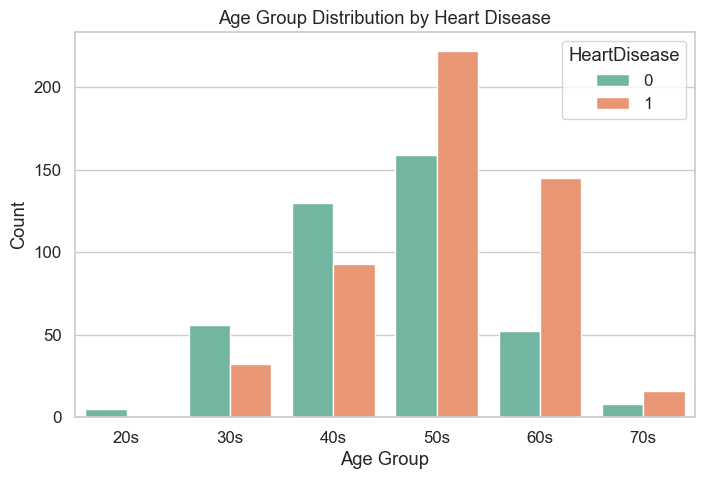

In [345]:
# Age group distribution
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='HeartDisease', data=df, palette='Set2')
plt.title('Age Group Distribution by Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

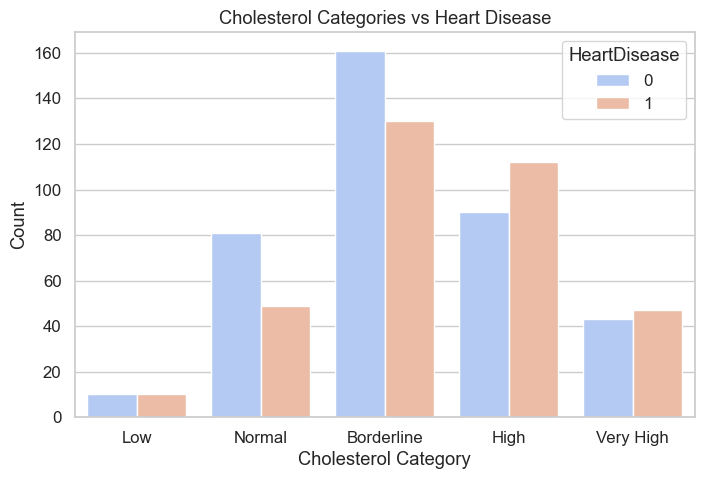

In [346]:
# Cholesterol cat bar
df['Chol_Cat'] = pd.cut(
    df['Cholesterol'],
    bins=[0,150,200,250,300,400],
    labels=['Low','Normal','Borderline','High','Very High']
)

plt.figure(figsize=(8,5))
sns.countplot(x='Chol_Cat', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Cholesterol Categories vs Heart Disease')
plt.xlabel('Cholesterol Category')
plt.ylabel('Count')
plt.show()

<Figure size 800x500 with 0 Axes>

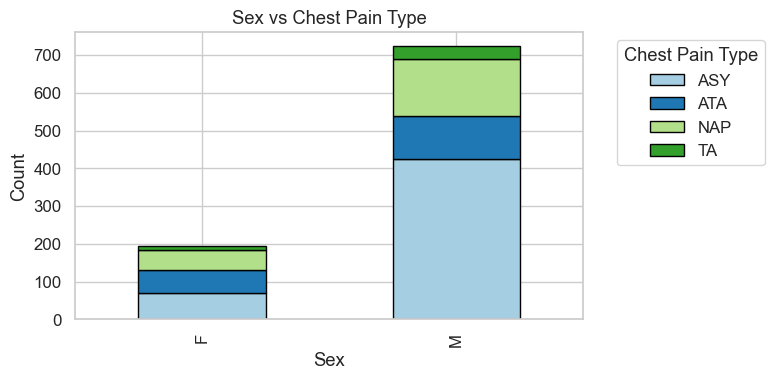

In [347]:
# Stacked bar - Sex & ChestPainType
plt.figure(figsize=(8,5))
pd.crosstab(df['Sex'], df['ChestPainType']).plot(
    kind='bar', stacked=True, color=sns.color_palette("Paired"), edgecolor='black'
)
plt.title('Sex vs Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

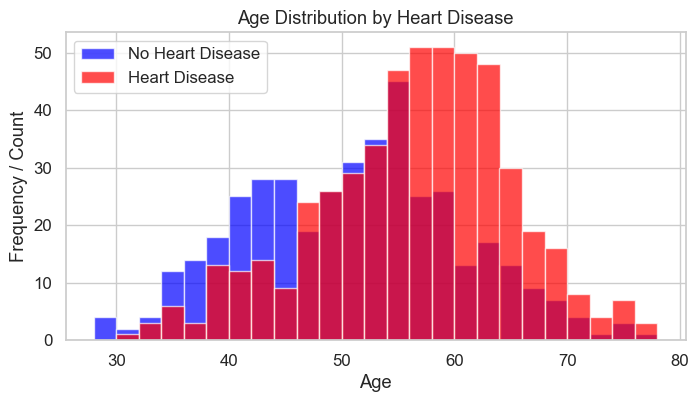

In [348]:
# Age Distributin _ heart disease
age_no_hd = df[df['HeartDisease'] == 0]['Age']
age_with_hd = df[df['HeartDisease'] == 1]['Age']


min_age = df['Age'].min()
max_age = df['Age'].max()
bins = range(int(min_age), int(max_age) + 2, 2) 


plt.hist(age_no_hd, bins=bins, alpha=0.7, label='No Heart Disease', color='blue')
plt.hist(age_with_hd, bins=bins, alpha=0.7, label='Heart Disease', color='red')


plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency / Count')
plt.legend()  


plt.show()

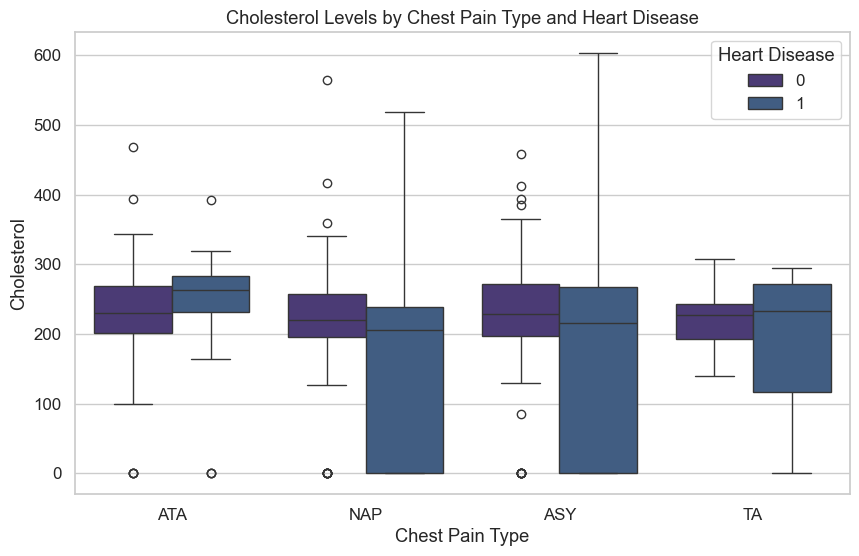

In [349]:
# cholestrol - Heart Disease
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='ChestPainType',
    y='Cholesterol',
    hue='HeartDisease' 
)

plt.title('Cholesterol Levels by Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')

plt.legend(title='Heart Disease')


plt.show()

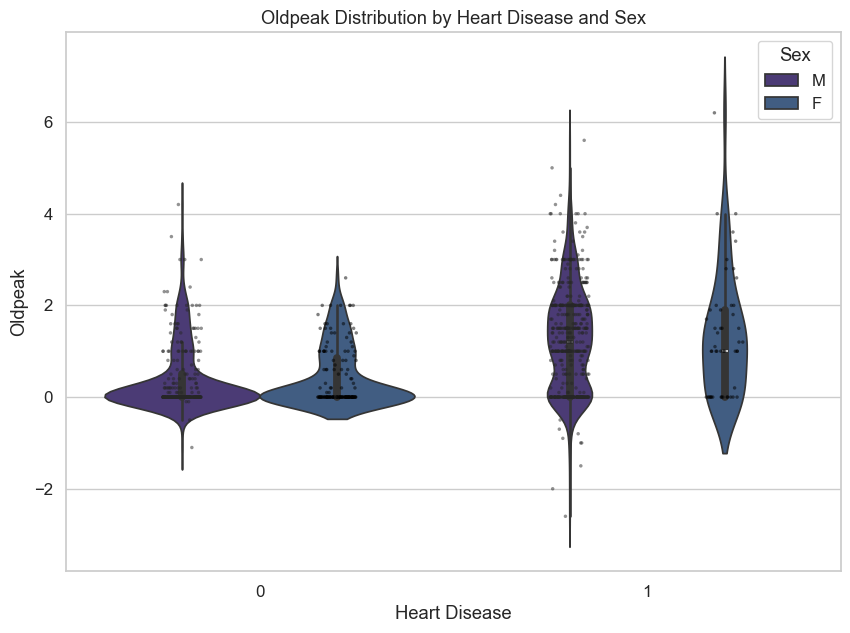

In [350]:
# Oldpeak vs heart Disease dan sex
plt.figure(figsize=(10, 7))
ax = plt.gca()  


sns.violinplot(
    data=df,
    x='HeartDisease',
    y='Oldpeak',
    hue='Sex',
    inner='box',  
    ax=ax
)

sns.stripplot(
    data=df,
    x='HeartDisease',
    y='Oldpeak',
    hue='Sex',
    dodge=True,    
    jitter=True,    
    color='black',  
    size=2.5,
    alpha=0.5,
    ax=ax
)



handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Sex')


plt.title('Oldpeak Distribution by Heart Disease and Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')


plt.show()

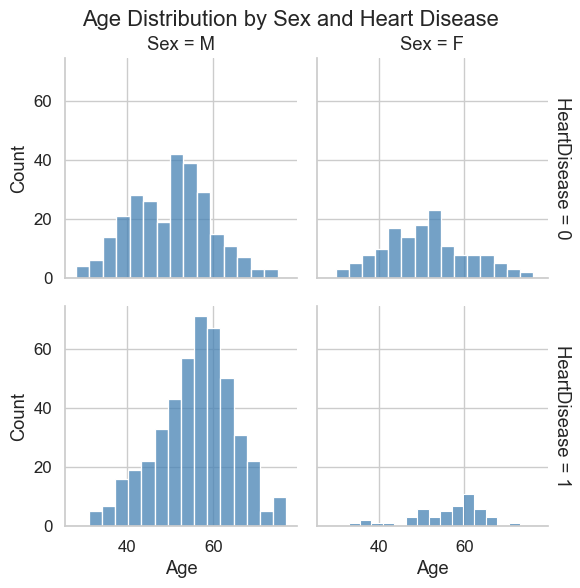

In [351]:
# Age distribution vs Sex vs HeartDisease
g = sns.FacetGrid(df, col='Sex', row='HeartDisease', margin_titles=True)
g.map(sns.histplot, 'Age', bins=15, color='steelblue')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Sex and Heart Disease')
plt.show()

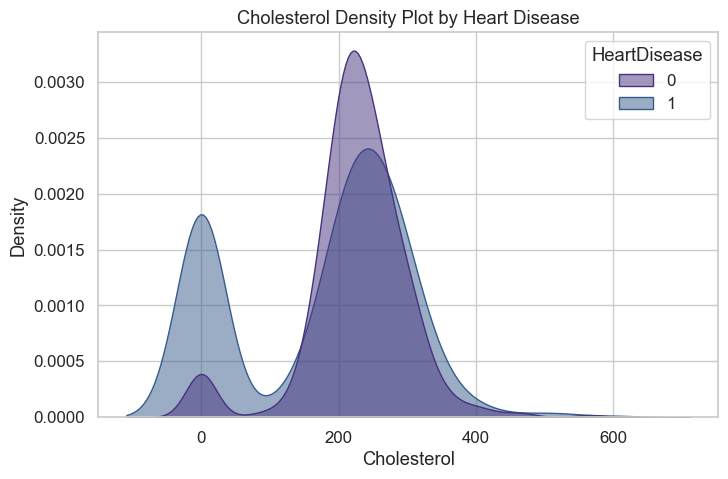

In [352]:
# Cholesterol vs HeartDisease
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Cholesterol', hue='HeartDisease', fill=True, alpha=0.5)
plt.title('Cholesterol Density Plot by Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

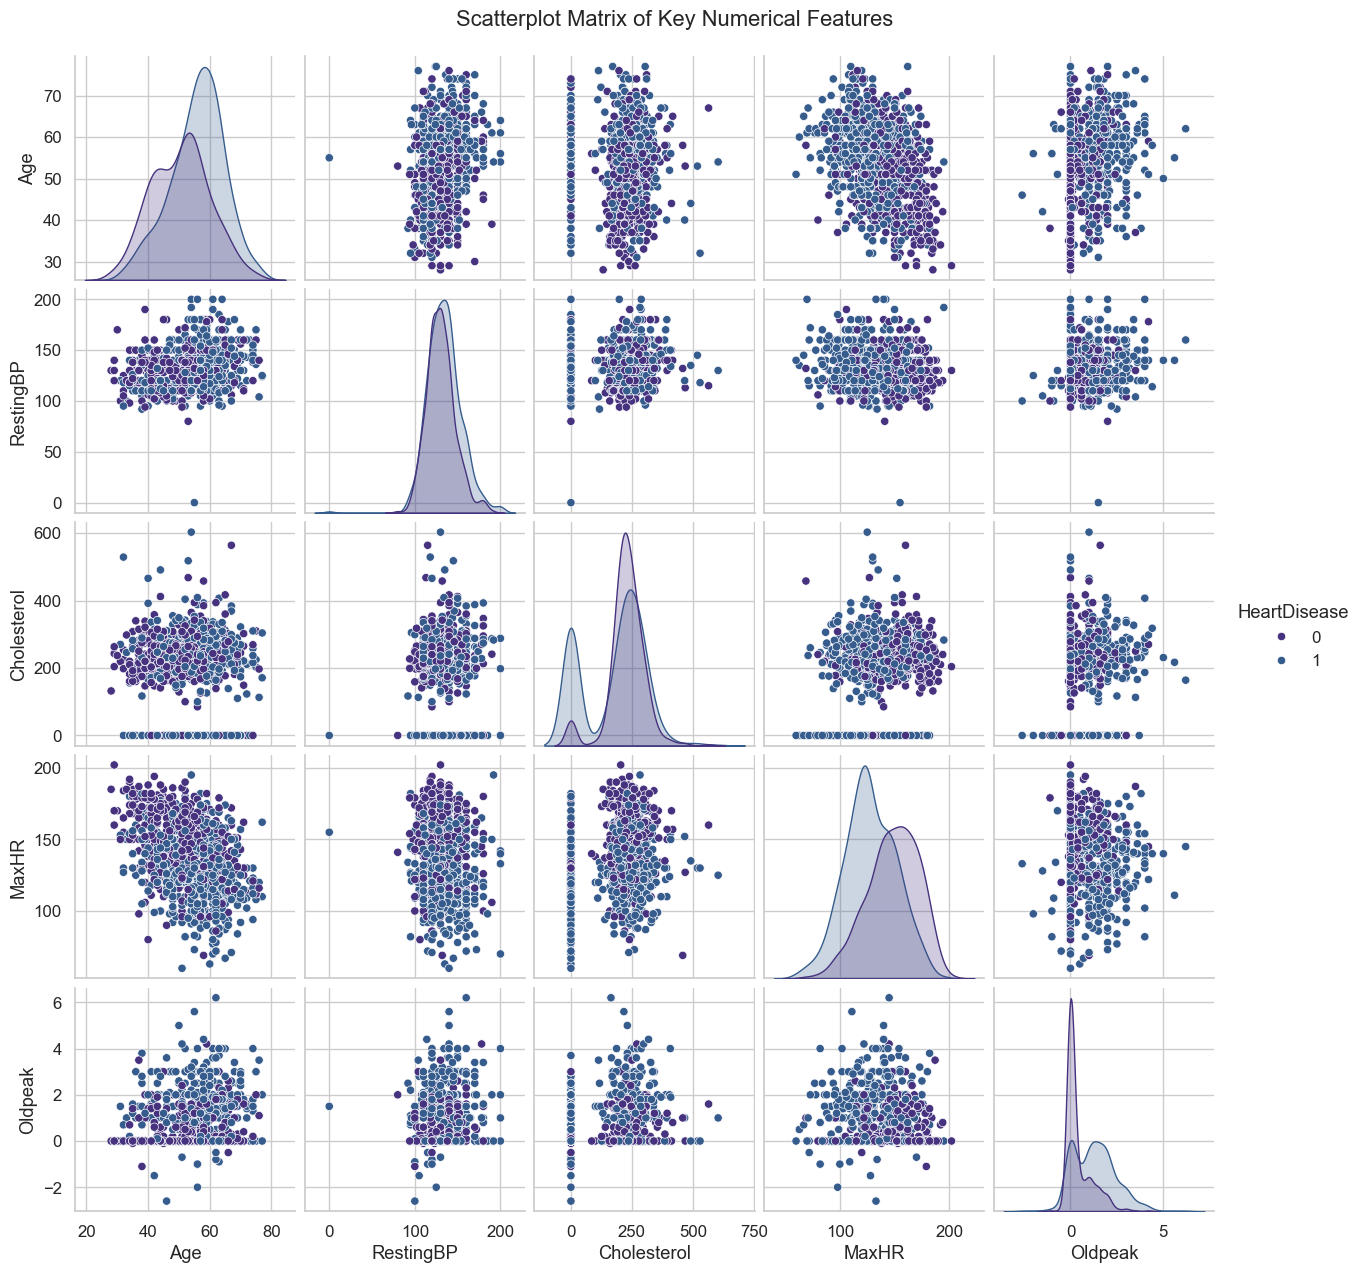

In [353]:
#  Scatterplot 
g = sns.pairplot(
    df,
    vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
    hue='HeartDisease'
)
g.fig.suptitle(
    'Scatterplot Matrix of Key Numerical Features',
    y=1.02  # Adjust this value if the title overlaps
)


plt.show()

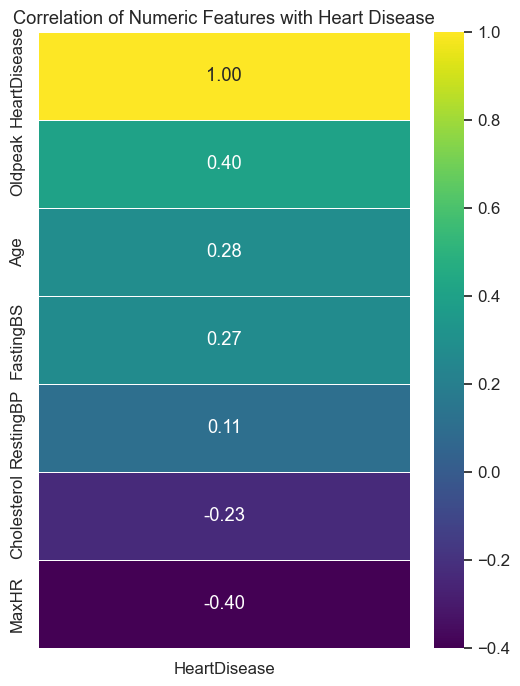

In [354]:
# correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr = numeric_df.corr()


plt.figure(figsize=(6,8))
sns.heatmap(
    corr[['HeartDisease']].sort_values(by='HeartDisease', ascending=False),
    annot=True, cmap='viridis', fmt='.2f', linewidths=0.5
)
plt.title('Correlation of Numeric Features with Heart Disease')
plt.show()

In [355]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.inspection import permutation_importance

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Optional: xgboost (try import; if not available, will skip)
try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

sns.set_style("whitegrid")
%matplotlib inline

In [356]:
# check

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df['HeartDisease'].value_counts(dropna=False))

Shape: (918, 14)
Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'AgeGroup', 'Chol_Cat']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    int64   
 12  AgeGroup        918 non-null    category
 1

In [357]:

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

if 'HeartDisease' in numeric_cols:
    numeric_cols.remove('HeartDisease')
if 'HeartDisease' in cat_cols:
    cat_cols.remove('HeartDisease')

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

Numeric cols: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical cols: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'AgeGroup', 'Chol_Cat']


In [358]:
# Missing value handling

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


df_clean = df.copy()

if numeric_cols:
    df_clean[numeric_cols] = num_imputer.fit_transform(df_clean[numeric_cols])
if cat_cols:
    df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])


print("Missing values per column after imputation:")
print(df_clean.isna().sum())

Missing values per column after imputation:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
AgeGroup          0
Chol_Cat          0
dtype: int64


In [359]:
# Outlier removal 
def remove_outliers_iqr(df_in, cols, factor=1.5):
    df = df_in.copy()
    mask = np.ones(len(df), dtype=bool)
    for c in cols:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        low = Q1 - factor * IQR
        high = Q3 + factor * IQR
        mask = mask & (df[c].between(low, high))
    return df[mask]


print("Before outlier removal:", df_clean.shape)
df_no_out = remove_outliers_iqr(df_clean, numeric_cols, factor=1.5)
print("After outlier removal:", df_no_out.shape)




Before outlier removal: (918, 14)
After outlier removal: (588, 14)


In [360]:
# Label encoding
df_enc = df_no_out.copy()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    le_dict[col] = le  # save encoder for inverse_transform if needed

print("Example encoded values:")
for c in cat_cols[:5]:
    print(c, le_dict[c].classes_)


Example encoded values:
Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
RestingECG ['LVH' 'Normal' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Down' 'Flat' 'Up']


In [361]:
# features prep
target = 'HeartDisease'
X = df_enc.drop(columns=[target])
y = df_enc[target].astype(int)  # ensure integer labels

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head(3)


X_scaled shape: (588, 13)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,AgeGroup,Chol_Cat
0,0.244898,1.0,0.333333,0.615385,0.639498,0.0,0.5,0.770992,0.0,0.027027,1.0,0.2,0.25
1,0.428571,0.0,0.666667,0.871795,0.297806,0.0,0.5,0.648855,0.0,0.297297,0.5,0.4,0.75
2,0.183673,1.0,0.333333,0.487179,0.620690,0.0,1.0,0.206107,0.0,0.027027,1.0,0.2,0.25


In [362]:
# rain/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (470, 13) Test size: (118, 13)


In [363]:

models = {
    "SVM": SVC(probability=True, kernel='rbf'),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=200, random_state=42),
}

if XGB_AVAILABLE:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
else:
    print("XGBoost not available — skipping XGBoost in model list.")

print("Models to be trained:", list(models.keys()))


XGBoost not available — skipping XGBoost in model list.
Models to be trained: ['SVM', 'RandomForest', 'ExtraTrees']


In [364]:

results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in models.items():
    try:
        cv_auc = cross_val_score(clf, X_train, y_train, cv=skf, scoring='roc_auc').mean()
    except Exception:
        cv_auc = np.nan

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_proba = clf.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min() + 1e-6)
    else:
        y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        'model': name,
        'cv_auc': cv_auc,
        'test_accuracy': acc,
        'test_precision': prec,
        'test_recall': rec,
        'test_f1': f1,
        'test_roc_auc': roc_auc,
        'estimator': clf
    })

results_df = pd.DataFrame(results).sort_values(by='test_roc_auc', ascending=False)
results_df[['model','cv_auc','test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']]


,model,cv_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,RandomForest,0.920078,0.830508,0.758621,0.88,0.814815,0.925147
0,SVM,0.918400,0.847458,0.775862,0.90,0.833333,0.922647
2,ExtraTrees,0.919247,0.822034,0.763636,0.84,0.800000,0.917500



===== RandomForest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        68
           1       0.76      0.88      0.81        50

    accuracy                           0.83       118
   macro avg       0.83      0.84      0.83       118
weighted avg       0.84      0.83      0.83       118



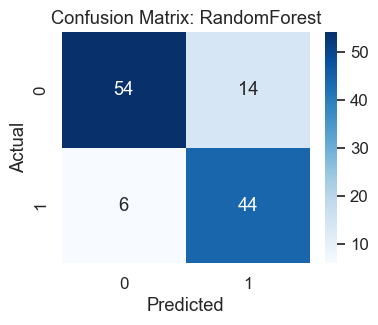


===== SVM =====
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        68
           1       0.78      0.90      0.83        50

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.86      0.85      0.85       118



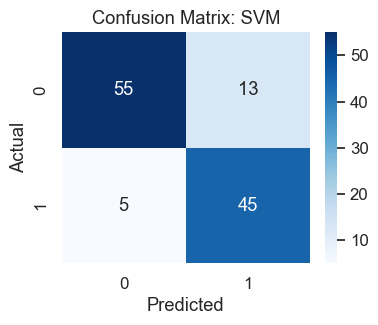


===== ExtraTrees =====
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        68
           1       0.76      0.84      0.80        50

    accuracy                           0.82       118
   macro avg       0.82      0.82      0.82       118
weighted avg       0.83      0.82      0.82       118



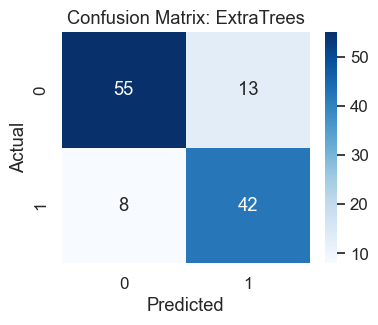

In [365]:
# consuion matrix models
top_models = results_df['model'].values[:3]
for name in top_models:
    clf = next(x['estimator'] for x in results if x['model']==name)
    y_pred = clf.predict(X_test)
    print(f"\n===== {name} =====")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


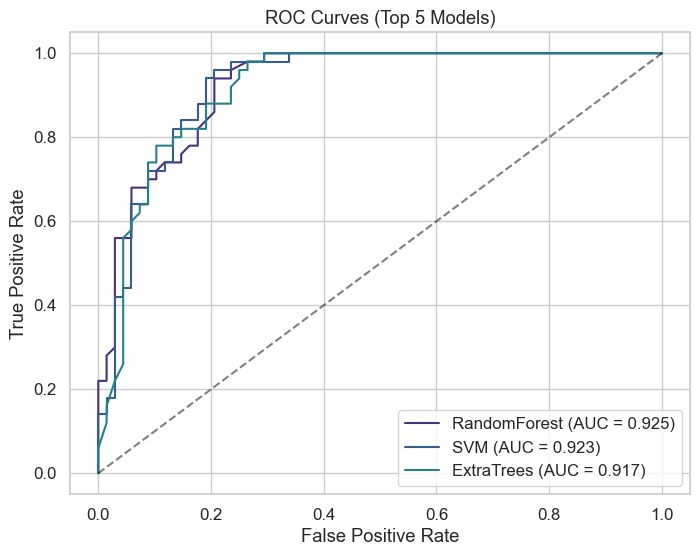

In [366]:
#perbandingan performa antar model
plt.figure(figsize=(8,6))
for idx, row in results_df.head(5).iterrows():
    name = row['model']
    clf = row['estimator']
    # get probabilities
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:,1]
    elif hasattr(clf, "decision_function"):
        score = clf.decision_function(X_test)
        y_proba = (score - score.min())/(score.max()-score.min()+1e-6)
    else:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Top 5 Models)')
plt.legend(loc='lower right')
plt.show()


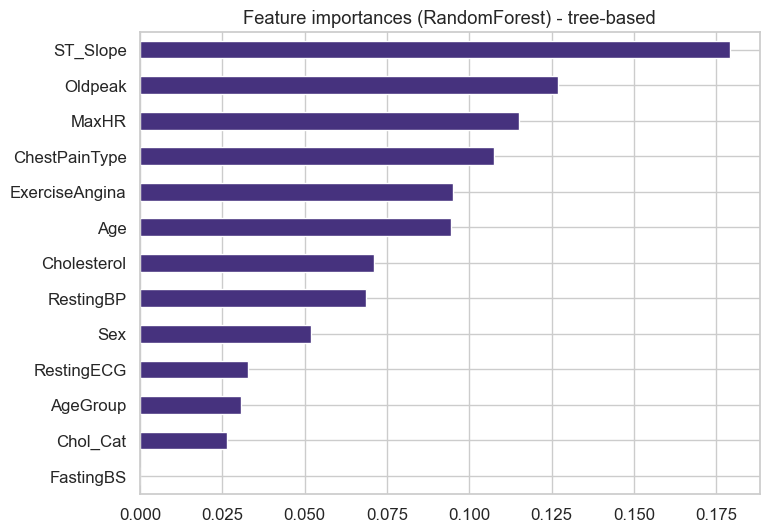

In [367]:


def plot_feature_importances(model, X_train, model_name, top_n=20):
    plt.figure(figsize=(8,6))
    if hasattr(model, 'feature_importances_'):
        fi = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        fi.head(top_n).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.title(f"Feature importances ({model_name}) - tree-based")
        plt.show()
    elif hasattr(model, 'coef_'):
        coef = np.abs(model.coef_).ravel()
        fi = pd.Series(coef, index=X_train.columns).sort_values(ascending=False)
        fi.head(top_n).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.title(f"Feature importances (abs coef) ({model_name}) - linear")
        plt.show()
    else:
        # permutation importance
        perm = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
        fi = pd.Series(perm.importances_mean, index=X_train.columns).sort_values(ascending=False)
        fi.head(top_n).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.title(f"Permutation importances ({model_name})")
        plt.show()

# Show feature importance for RandomForest (if present)
if 'RandomForest' in results_df['model'].values:
    rf = next(r['estimator'] for r in results if r['model']=='RandomForest')
    plot_feature_importances(rf, X_train, 'RandomForest')

# Also show for LogisticRegression and GradientBoosting if present
for m in ['LogisticRegression','GradientBoosting']:
    if m in results_df['model'].values:
        est = next(r['estimator'] for r in results if r['model']==m)
        plot_feature_importances(est, X_train, m)


In [368]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup,Chol_Cat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,30s,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40s,Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30s,High
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40s,Borderline
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50s,Normal
